# A.G.N

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98% !important; }</style>"))

In [2]:
#config: same as 3.0 

## Full Synchrotron Spectra

In [3]:
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.special as sp
import scipy.constants as cn
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.constants as cn
import scipy.special as sp
import astropy.units as u
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.utils.plot import plot_sed
import time

start = time.time()
kpc = 3.085677558128*10**21
pc = 3.085677558128*10**18

#Constants in cgs
fortio =4.80*10**(-10)
c = 2.997925*10**10
me =9.109*10**(-28)
mp = 1.672614*10**(-24)
hpl = 6.25*10**(-27)

B=0.001 #s.f.p
B2=0.01
B3=0.1

gmin_e = 1.2*10**5
gmax_e = 2*10**6

gmin_p = 3*10**4
gmax_p = 3*10**5

ps_e = 4.
ps_p = 2

Ro=10**10

#No_e=6.5*10**50 #f.p
No_p=1.5*10**56

d_L= 18.5*10**3*kpc#(source luminosity distance):1.00e+27 cm


#kpc to cm 3.085677558128


C_e=(-ps_e+1)/((me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))
C_p=No_p*(-ps_p+1)/((mp*c**2)**(-ps_p+1)*(gmax_p**(-ps_p+1)-gmin_p**(-ps_p+1)))
Constant_e=(C_e*4*cn.pi*fortio**2*me*c*(me*c**2)**(-ps_e))/3
Constant_p=(C_p*4*cn.pi*fortio**2*mp*c*(mp*c**2)**(-ps_p))/3

#Electrons power [erg/s]
def p_e(n,No_e):
    res = dblquad(lambda x, g: No_e*Constant_e*n*g**(-2-ps_e)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-n*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf)
    return res

v_e = numpy.logspace(10,20,100)
P_e = v_e*0
P_e2 = v_e*0
P_e3 = v_e*0

for i in range(len(v_e)):
    P_e[i] = p_e(v_e[i],6.5*10**50)[0]  
    P_e2[i] = p_e(v_e[i],6.5*10**51)[0]
    P_e3[i] = p_e(v_e[i],6.5*10**52)[0]
    
    
#Flux of the source
Fn_e = P_e/(4*cn.pi*d_L**2)
Fn_e2 = P_e2/(4*cn.pi*d_L**2)
Fn_e3 = P_e3/(4*cn.pi*d_L**2)




Ca_e=(-ps_e+1)/(4*cn.pi*Ro**3*(me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))
AbsConstant_e=Ca_e*(ps_e+2)*fortio**2*(me*c**2)**(-ps_e)*c/(6)

def abs_e(n,No_e):      
    resa = dblquad(lambda x, g: No_e*AbsConstant_e*(g**(-ps_e-3)/n)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-n*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf, epsabs=1.49e-28, epsrel=1.49e-18)
    return resa

Abs_e = v_e*0
Abs_e2 = v_e*0
Abs_e3 = v_e*0

Pabs_e = v_e*0

ssa_e = 0

for i in range(len(v_e)):
    Abs_e[i] = abs_e(v_e[i],6.5*10**50)[0] 
    Abs_e2[i] = abs_e(v_e[i],6.5*10**51)[0] 
    Abs_e3[i] = abs_e(v_e[i],6.5*10**52)[0] 

    
    
Iabs_e=v_e*0


t_ne = Ro*Abs_e #optiko vathos
   
#find the index of the table t_n in which the source is becoming optical thick    
for i in range(len(v_e)):      
    if t_ne[i] >= 1:
        ssa_e = i
        
vssa_e = v_e[ssa_e] #aprrox is the value of vssa


#Iabs2_e = P_e*(1-np.exp(-Abs_e*Ro))/((4*cn.pi)**2*Ro**3*Abs_e) 
Iabs_e = P_e*(-np.expm1(-Abs_e*Ro))/((4*cn.pi)**2*Ro**3*Abs_e)
Iabs_e2 = P_e2*(-np.expm1(-Abs_e2*Ro))/((4*cn.pi)**2*Ro**3*Abs_e2)
Iabs_e3 = P_e3*(-np.expm1(-Abs_e3*Ro))/((4*cn.pi)**2*Ro**3*Abs_e3)

        
#From Intensity to Flux 
Fabs_e=v_e*0
Fabs_e2=v_e*0
Fabs_e3=v_e*0

for i in range(len(v_e)):
    Fabs_e[i]=cn.pi*Ro**2*Iabs_e[i]/d_L**2        
    Fabs_e2[i]=cn.pi*Ro**2*Iabs_e2[i]/d_L**2
    Fabs_e3[i]=cn.pi*Ro**2*Iabs_e3[i]/d_L**2
 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\CHARAL~1\AppData\Local\Temp/ipykernel_17260/204016228.py:125: RuntimeWarning: invalid value encountered in true_divide
  Iabs_e = P_e*(-np.expm1(-Abs_e*Ro))/((4*cn.pi)**2*Ro**3*Abs_e)
C:\Users\CHARAL~1\AppData\Local\Temp/ipykernel_17260/204016228.py:126: RuntimeWarning: invalid value encountered in true_divide
  Iabs_e2 = P_e2*(-np.expm1(-Abs_e2*Ro))/((4*cn.pi)**2*Ro**3*Abs_e2)
C:\Users\CHARAL~1\AppData\Local\Temp/ipykernel_17260/204016228.py:127: RuntimeWarning: invalid value encountered in true_divide
  Iabs_e3 = P_e3*(-np.expm1(-Abs_e3*Ro))/((4*cn.pi)**2*Ro**3*Abs_e3)


In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

Runtime of the program is 133.377099275589


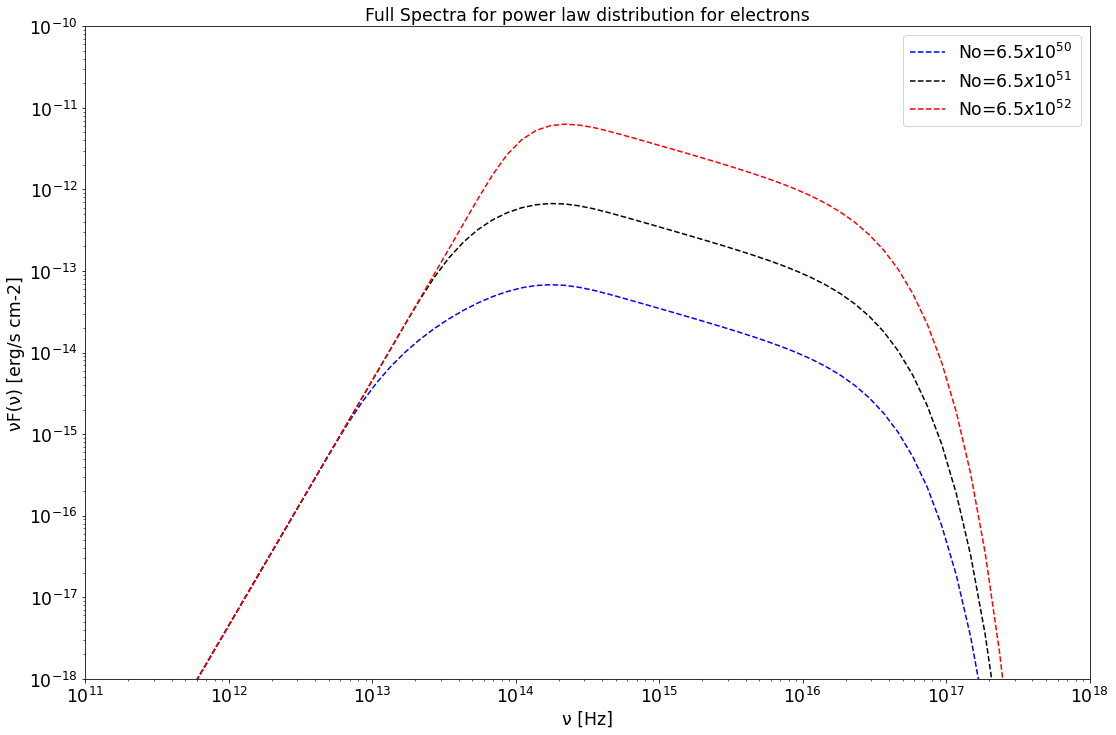

In [5]:
plt.figure(figsize=(18,12))    
#plt.plot(nas,A,label='electrons',ls="--", color="red")
#plt.plot(nas,F)
#plt.plot(q,x)
plt.plot(v_e,v_e*Fabs_e , label='No=$6.5x10^{50}$ ',ls="--", color="blue")
plt.plot(v_e,v_e*Fabs_e2 , label='No=$6.5x10^{51}$',ls="--", color="black")
plt.plot(v_e,v_e*Fabs_e3 , label='No=$6.5x10^{52}$',ls="--", color="red")

#plt.plot(v_p,v_p*Fabs_p, label='Protons',ls="--", color="indianred")
#plt.plot(v_p,v_p*Fall, label='SED',ls="--", color="black")

#|plt.scatter(v_e,v_e*Fabs_e, label='Flux',ls="-", color="red")
#plt.plot(v_e,v_e*Pabs2_e, label='My Calc with no correction',ls="--")
#plt.plot(nu,seda,label='Agnst Calc',ls="--", color="black")
#plt.scatter(nu,seda,label='Agnst Calc',ls="--", color="black")
plt.legend()
#plt.plot(v_e,fu)
#plt.plot(v_e,fu1)
#plt.plot(v_e, v_e*Pabs2_e, label='Pabs2_e', color="green")
plt.ylim(1e-18,1e-10)
plt.xlim(1e11,1e18)
plt.xlabel("ν [Hz]")
plt.ylabel("νF(ν) [erg/s cm-2]")
plt.yscale("log")
plt.xscale("log")
#plt.scatter(dv,nFn)
plt.title("Full Spectra for power law distribution for electrons")    
    
time.sleep(1)


end = time.time()

print(f"Runtime of the program is {end - start}") 